## **Regresión Lineal Simple**

La regresión lineal simple consiste en generar un modelo de regresión (ecuación de una recta) que permita explicar la relación lineal que existe entre dos variables. A la variable dependiente o respuesta se le identifica como Y y a la variable predictora o independiente como X.

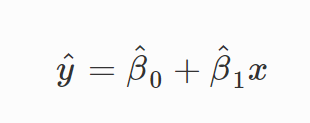

### Correlación lineal

Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación.

Para ello calculamos el coeficiente de Correlación R de Pearson, el cual nos explica cuanta relación tienen ambas variables.

Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de fuerza de asociación (tamaño del efecto):

*   0: asociación nula.
*   0.1: asociación pequeña.
*   0.3: asociación mediana.
*   0.5: asociación moderada.
*   0.7: asociación alta.
*   0.9: asociación muy alta.



In [8]:
# Importar la librería Pandas

import pandas as pd

In [9]:
# Creamos el DataFrame

df_pss = pd.read_csv('presion_sanguinea_sistolica.csv')
df_pss

,Nro,Edad,PSS
0,1,44,142
1,2,46,142
2,3,42,138
3,4,57,168
4,5,21,120
...,...,...,...
64,65,47,156
65,66,68,172
66,67,56,165
67,68,36,124


In [10]:
# Estadísticos de nuestros datos

df_pss.describe()

,Nro,Edad,PSS
count,69.000000,69.000000,69.000000
mean,35.000000,46.507246,148.724638
std,20.062403,14.584060,18.475647
min,1.000000,17.000000,110.000000
25%,18.000000,38.000000,135.000000
50%,35.000000,47.000000,149.000000
75%,52.000000,59.000000,162.000000
max,69.000000,70.000000,185.000000


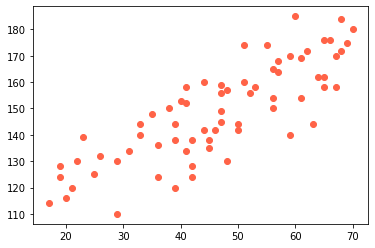

In [11]:
# Importar módulo matlplotlib
from matplotlib import pyplot as plt

# Leemos los datos accediendo a la columna correspondiente
x = df_pss['Edad']
y = df_pss['PSS']

# Graficamos el diagrama de dispersión

plt.scatter(x, y, color='tomato')

plt.show()

In [12]:
# Importamos módulo numpy

import numpy as np

# Usaremos el método round() para redondear los resultados

# Calculamos los promedios
promedio_x = round(x.mean(), 2)
promedio_y = round(y.mean(), 2)

# Calculamos la desviación estándar
desv_std_x = round(np.std(x), 2)
desv_std_y = round(np.std(y), 2)

# Calculamos la varianza
var_x = round(np.cov(x, y)[0][0], 2)

# Calculamos la covarianza
cov_x_y = round(np.cov(x, y)[0][1], 2)

# Mostramos los resultados

print("El promedio la variable x es: ",promedio_x)
print("El promedio la variable y es: ",promedio_y)
print("La desviación estándar de x es: ",desv_std_x)
print("La desviación estándar de y es: ",desv_std_y)
print("La varianza de x es: ",var_x)
print("La covariabnza de x e y es: ",cov_x_y)

# Calculamos el coeficiente de Correlación R de Pearson 

rPearson = round( cov_x_y/(desv_std_x * desv_std_y), 2)

print("El coeficiente de correlación R de Person es: ", rPearson)

# Calculamos el estimador Beta 1 (pendiente)

beta_1 = round((cov_x_y/var_x), 2)

# Calculamos el estimador Beta 0 (intercepto)

beta_0 = round((promedio_y-beta_1*promedio_x), 2)

print(f"Los parámetros de la función estimada son: {beta_0} para el Beta 0 y {beta_1} para el Beta 1 o intecepto.")


El promedio la variable x es:  46.51
El promedio la variable y es:  148.72
La desviación estándar de x es:  14.48
La desviación estándar de y es:  18.34
La varianza de x es:  212.69
La covariabnza de x e y es:  220.95
El coeficiente de correlación R de Person es:  0.83
Los parámetros de la función estimada son: 100.35 para el Beta 0 y 1.04 para el Beta 1 o intecepto.


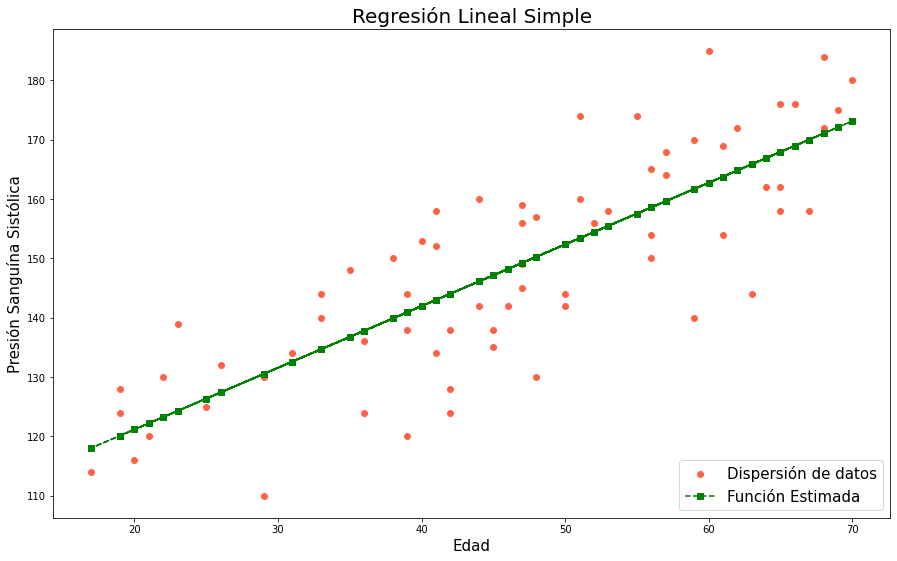

In [20]:
# Crear el gráfico de la función estimada a través de la Regresión Lineal
from matplotlib import pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(15, 9))

# Gráfico de los datos originales

plt.plot(x, y, marker='o', linestyle='', color='tomato', label='Dispersión de datos')

# Gráfico de Función estimada
x2 = df_pss['Edad']

y2=[]
for i,e in enumerate(x):
  value = beta_0 + beta_1 * x2[i]
  y2.append(value)

plt.plot(x2, y2, marker='s', linestyle='--', color='g', label='Función Estimada')
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Presión Sanguína Sistólica', fontsize=15)
plt.title('Regresión Lineal Simple', fontsize=20)
plt.legend(loc='lower right', fontsize=15)
plt.show()